## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn models/estimators:

        1. Estimator's built- in `score()` method
        2. The `scoring` parameater
        3. Problem specifit metric functions

you can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

###  4.1 Evaluating model with score method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["target"] = housing["target"]

heart_disease = pd.read_csv("heart-disease.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


x= housing_df.drop("target",axis = 1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # Nomal train & split

model = RandomForestRegressor(n_estimators=80)

model.fit(x_train,y_train);

In [3]:
score = model.score(x_test,y_test) # cross validation here cv is each fold therefore it given us f diffrent score
score

0.8063285573441384

In [4]:
cross_val_score(model,x,y,cv=5)

array([0.49082605, 0.70282919, 0.74070244, 0.61802749, 0.68193114])

In [5]:
cross_val = np.mean(cross_val_score(model,x,y,cv=5))

In [6]:
score,cross_val #Compare the two

(0.8063285573441384, 0.6472925565471923)

In [7]:
# Scoring parameater set to None by default
cross_val_score(model,x,y,cv=5, scoring=None) # scoring parameater means we use default parameater that is .score() we cant't define our,s

array([0.52590548, 0.70206252, 0.74205126, 0.62168657, 0.68068656])

### 4.2.1 Clasification model evaluation metrics

1.Accuracy

2.Area undr RoC curve

3.Confusion matrix

4.Classlfication report

#### 1.Accuracy

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)


x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)
    
clf.score(x_test,y_test)

cross_val_score = cross_val_score(clf,x,y,cv=5)

In [26]:
print(f"Heart Disease Classifier cross validation Accuracy :{np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier cross validation Accuracy :81.16%


**Area under the recevier Oprating Characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* Roc Curve

ROC curves are a comparision of a model's true positive rate (tpr) v/s a models false positive rate(fpr).

* True positive = model predicts 1 when is 1.
* False positive = model predicts 1 when truth is 0.
* True negative = moddel predicts 0 when truth is 0.
* False negative = model predicts 0 whwn truth is 1.

In [42]:
y_proba = clf.predict_proba(x_test)
y_proba[:10]

array([[0.07, 0.93],
       [0.81, 0.19],
       [0.21, 0.79],
       [0.19, 0.81],
       [0.7 , 0.3 ],
       [0.3 , 0.7 ],
       [0.28, 0.72],
       [0.39, 0.61],
       [0.15, 0.85],
       [0.04, 0.96]])

In [43]:
y_proba_score = y_proba[:,1]
y_proba_score

array([0.93, 0.19, 0.79, 0.81, 0.3 , 0.7 , 0.72, 0.61, 0.85, 0.96, 0.82,
       0.52, 0.91, 0.19, 0.97, 0.86, 0.63, 0.35, 0.55, 0.88, 0.11, 0.59,
       0.77, 0.67, 0.37, 0.07, 0.7 , 0.65, 0.69, 0.73, 0.98, 0.96, 0.92,
       0.65, 0.88, 0.51, 0.32, 1.  , 0.52, 0.8 , 0.93, 0.77, 0.3 , 0.59,
       0.99, 0.88, 0.79, 0.51, 0.13, 0.99, 0.98, 0.06, 0.69, 0.79, 0.43,
       0.67, 1.  , 0.63, 0.25, 0.14, 0.12, 0.18, 0.56, 0.14, 0.13, 0.87,
       0.2 , 0.46, 0.74, 0.66, 0.87, 0.44, 0.66, 0.89, 0.75, 0.6 , 0.76,
       0.24, 0.29, 0.09, 0.1 , 0.69, 0.88, 0.99, 0.91, 0.12, 0.22, 0.14,
       0.06, 0.87, 1.  , 0.83, 0.7 , 0.54, 0.87, 0.97, 0.45, 0.98, 0.82,
       0.23, 0.72, 0.52, 0.54, 0.11, 0.82, 0.98, 0.85, 0.73, 1.  , 0.13,
       0.95, 0.33, 0.63, 0.35, 0.1 , 0.29, 0.97, 0.37, 0.58, 0.81, 0.84,
       0.66, 0.7 , 0.42, 0.67, 0.54, 0.33, 0.75, 0.88, 0.87, 0.74, 0.86,
       0.92, 0.78, 0.32, 0.64, 0.19, 0.56, 0.89, 0.59, 0.84, 0.75, 0.75,
       0.2 , 0.65, 0.97, 1.  , 0.56, 0.98, 0.12, 0.

In [44]:
from sklearn.metrics import roc_curve

fpr,tpr,tresholds = roc_curve(y_test,y_proba_score)

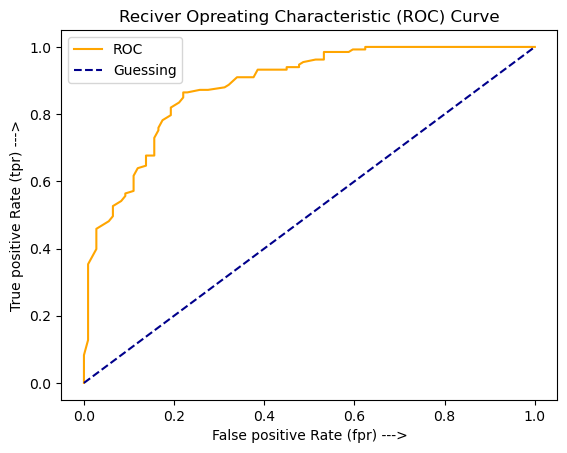

In [45]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    
    plt.xlabel("False positive Rate (fpr) --->")
    plt.ylabel("True positive Rate (tpr) --->")
    plt.title("Reciver Opreating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()


plot_roc_curve(fpr,tpr) 

In [46]:
from sklearn.metrics import roc_auc_score

float(roc_auc_score(y_test,y_proba_score))

0.8834241567220804

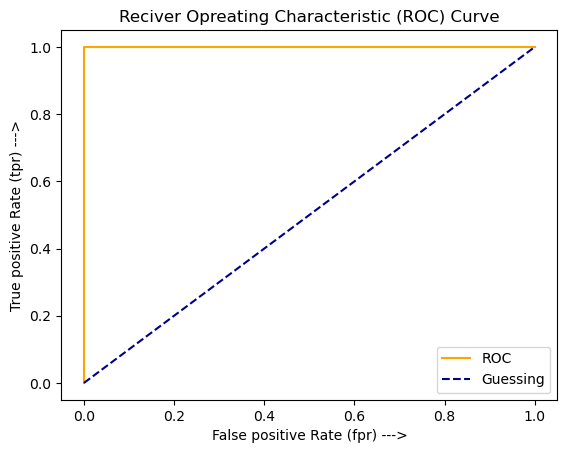

In [47]:
fpr,tpr,treshold = roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)

In [48]:
float(roc_auc_score(y_test,y_test))

1.0

**Confusion matrix**

A confusion matrix is a quick way to compare the lables a model predicts and the actual labels it was supposed to predict.


In essence , giveing you the idea where the model is geting confused

In [50]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[ 67,  42],
       [  9, 124]], dtype=int64)

In [51]:
pd.crosstab(y_test,y_preds)

col_0    0    1
target         
0       67   42
1        9  124

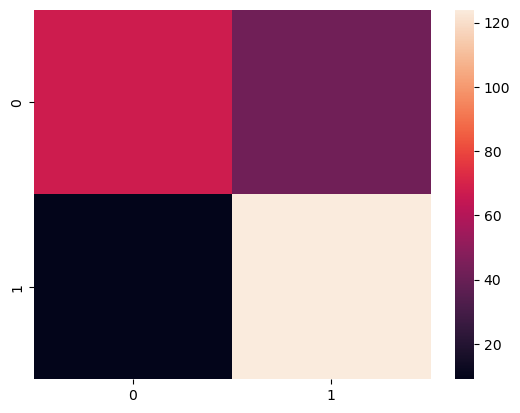

In [53]:
import seaborn as sns

con_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(con_mat)
plt.plot();

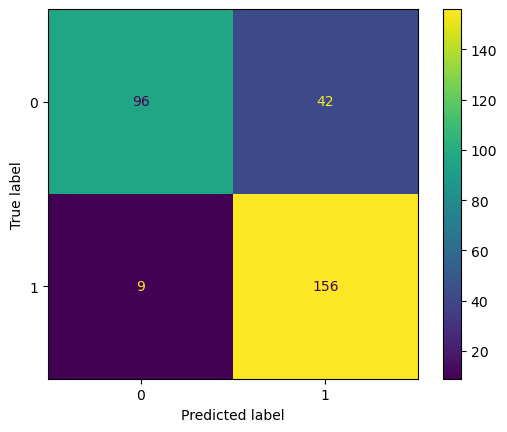

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf,x,y)

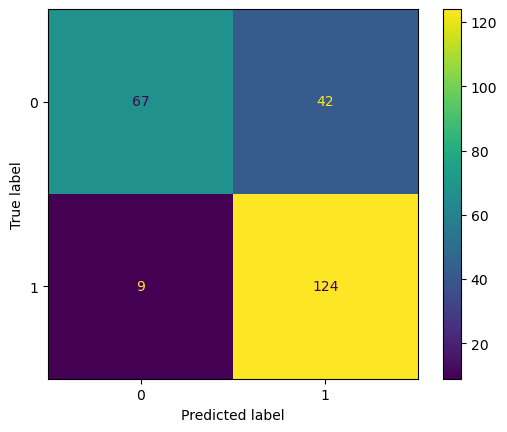

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

### Classification report

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       109
           1       0.75      0.93      0.83       133

    accuracy                           0.79       242
   macro avg       0.81      0.77      0.78       242
weighted avg       0.81      0.79      0.78       242



## Regression model evaluation matrix

### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/1.5/modules/model_evaluation.html 

The one's we're going to cover are:

1. R^2 (pronounced r-requared) of coefficent of determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)


### 4.2.2 Regression model evaluation metrics

In [82]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

model.score(x_test,y_test)

y_preds = model.predict(x_test)

In [83]:
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [84]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

y_test_mean = np.full(len(y_test),y_test.mean())

y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [85]:
r2_score(y_test,y_test_mean)
# If you model is good then you should get score of 0 or negative it is considered goood 😊

0.0

In [86]:
df = pd.DataFrame({"Actual Values":y_test,"Predicted values":y_preds})

df["Diffrences"] = df["Predicted values"]-df["Actual Values"]
df.head()

Actual Values  Predicted values  Diffrences
20046        0.47700          0.493900    0.016900
3024         0.45800          0.754940    0.296940
15663        5.00001          4.928596   -0.071414
20484        2.18600          2.540240    0.354240
9814         2.78000          2.331760   -0.448240

In [87]:
MAE =np.abs(df.Diffrences).mean()
MAE

0.32656738464147306

In [89]:
mae = mean_absolute_error(y_test,y_preds)
mae

0.32656738464147306

In [90]:
df = pd.DataFrame({"Actual Values":y_test,"Predicted values":y_preds})

df["Diffrences"] = df["Predicted values"]-df["Actual Values"]
df.head()

Actual Values  Predicted values  Diffrences
20046        0.47700          0.493900    0.016900
3024         0.45800          0.754940    0.296940
15663        5.00001          4.928596   -0.071414
20484        2.18600          2.540240    0.354240
9814         2.78000          2.331760   -0.448240

In [93]:
mse = np.square(df.Diffrences).mean()
mse

0.25336408094921037

In [94]:
MSE = mean_squared_error(y_test,y_preds)
MSE

0.25336408094921037

##### More the value worse the model is 😒 less the value good the model is 😊
Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being  `$10,000`   off is twice as bad as being   `$5,000` off.

Pay more attention to MSE: When being `$10,000` off is more than twice as bad as being `$5,000` off.